                                                 IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory classification tasks.

In [57]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
warnings.filterwarnings('ignore')

In [59]:
# Import CSV File

df = pd.read_csv(r'D:\CodSoft\Task3_Iris\IRIS.csv')

In [60]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 1. Understanding Of Data

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset, target column is 'Species'

In [62]:
# Shape of the dataset

df.shape

(150, 5)

Total number of rows: 150

Total number of columns: 5 

In [63]:
# Columns Information

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

1. sepal_length: Length of the sepal

2. sepal_width: Width of the sepal

3. petal_length: Length of the petal

4. petal_width: Width of the petal

5. species: Name of the species of the flower

In [64]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Analysis:
    
    1. Average sepal length is 5.843333
    
    2. Average sepal width is 3.054000
    
    3. Minimum sepal length and width is 4.300000 and 2.000000 respectively
    
    4. Maximum sepal length and width is 7.900000 and 4.400000 respectively
    
    5. Average petal length is 3.758667
    
    6. Average petal width is 1.198667
    
    7. Minimum petal length and width is 1.000000 and 0.100000 respectively
    
    8. Maximum petal length and width is 6.900000 and 2.500000 respectively

# 2. Data Cleaning

# Check for null values

In [65]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in the dataset.

# Check for datatypes

In [66]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Rename the species name

In [67]:
df['species'] = df['species'].str.replace('Iris-', '')

In [68]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 3. Exploratory Data Analysis

# * Univariate Analysis

# Species

<Axes: title={'center': 'Species'}>

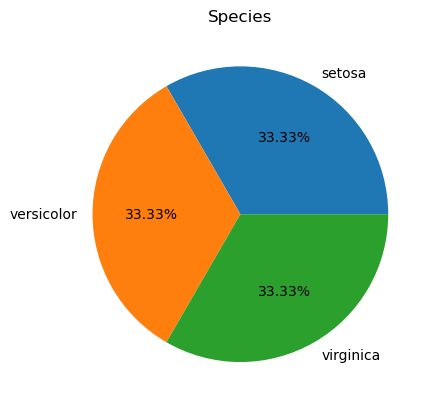

In [69]:
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

* All the three species have equal amount of data in the dataset.

# Sepal Length

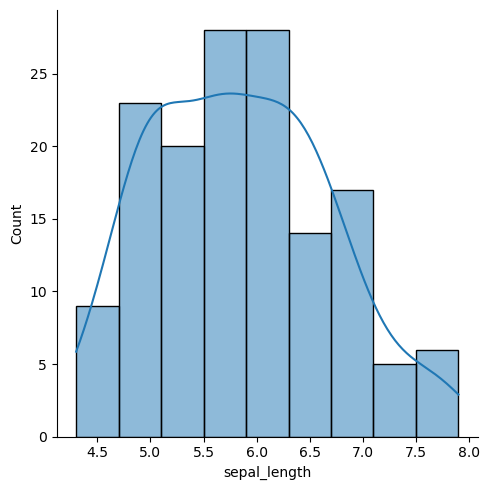

In [70]:
sns.displot(data = df, x = 'sepal_length', kde = True)

* Most of the flowers have the petal length between 5.5 to 6.5

# Sepal Width

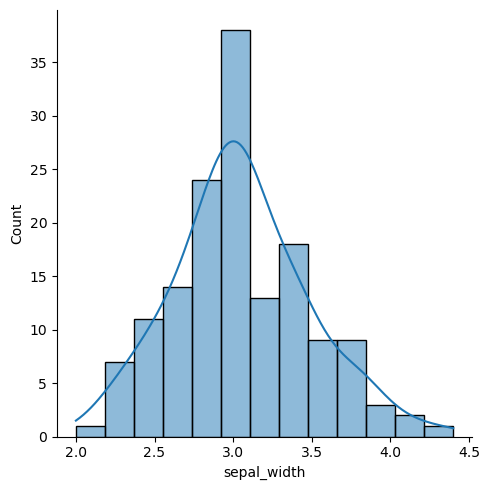

In [71]:
sns.displot(data = df, x = 'sepal_width', kde = True)

* Most of the flowers have sepal width of 3.

# Petal Length

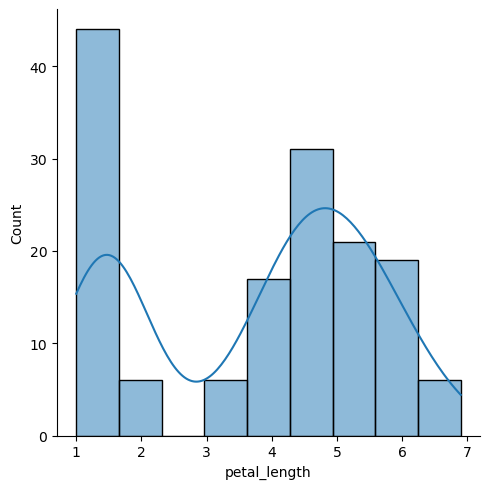

In [72]:
sns.displot(data = df, x = 'petal_length', kde = True)

* Most of the flowers have petal length of 1 to 1.5.

* There is no flower in the dataset whose petal length is between 2 to 3. 

# Petal Width

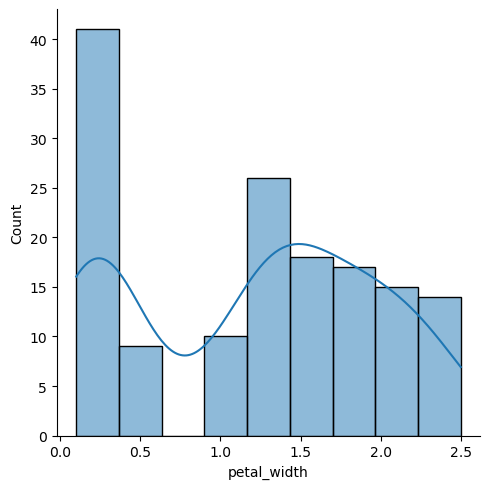

In [73]:
sns.displot(data = df, x = 'petal_width', kde = True)

* Most of the flowers have petal width less than 0.5

* There is no flower in the dataset whose petal width is between 0.5 to 1

# * Bivariate Analysis

# Sepal Width with Species

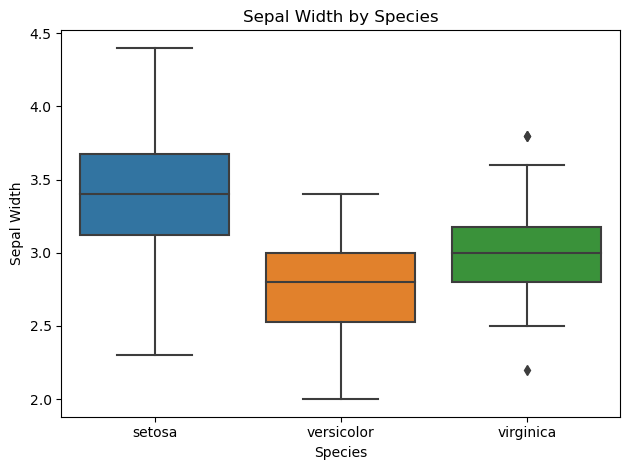

In [74]:
sns.boxplot(data=df, x='species', y='sepal_width')
plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

* Speal width of 'Setosa' flower is highest among all the species.

* Sepal width of 'Versicolor' flower is lowest among all the species.

* There are some outliers in 'Virginica' flower.

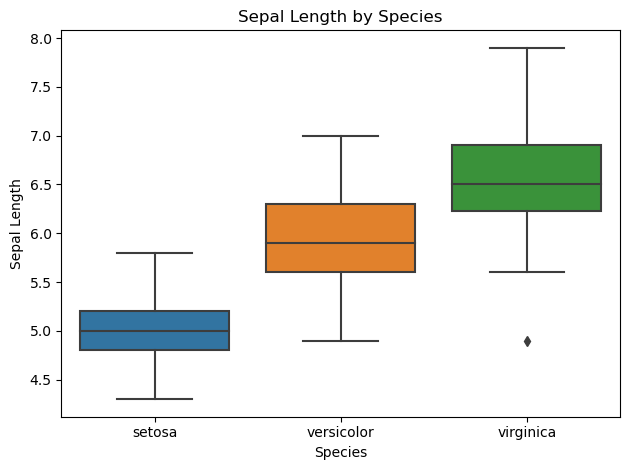

In [75]:
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

plt.tight_layout()
plt.show()

* Sepal length of 'Virginica' flower is highest among all the species.

* Sepal length of 'Setosa' flower is lowest among all the species.

* There are some outlier in 'Virginica' specie.

# Petal Width with Species

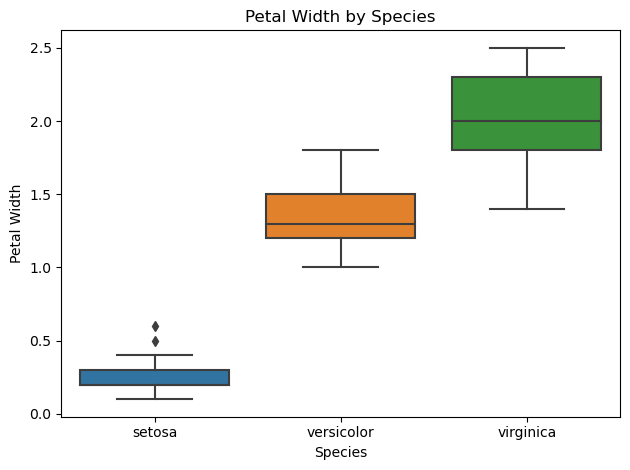

In [76]:
sns.boxplot(data=df, x='species', y='petal_width')
plt.title('Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

* Petal width of 'Virginica' flower is the highest among all the species.

* Petal width of 'Setosa' flower is lowest among all the species.

* There are some outliers in 'Setosa' specie.

# Petal Length with Species

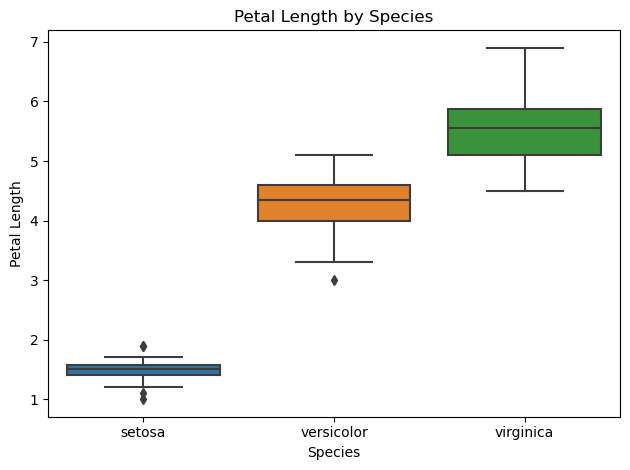

In [77]:
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.tight_layout()
plt.show()

* Petal length of 'Virginica' flower is the highest among all the species.

* Petal length of 'Setosa' flower is the lowest among all the species.

* There are some outliers in 'Setosa' and 'Versicolor' species.

# * Multivariate Analysis

# Sepal Length v/s Sepal Width with Species

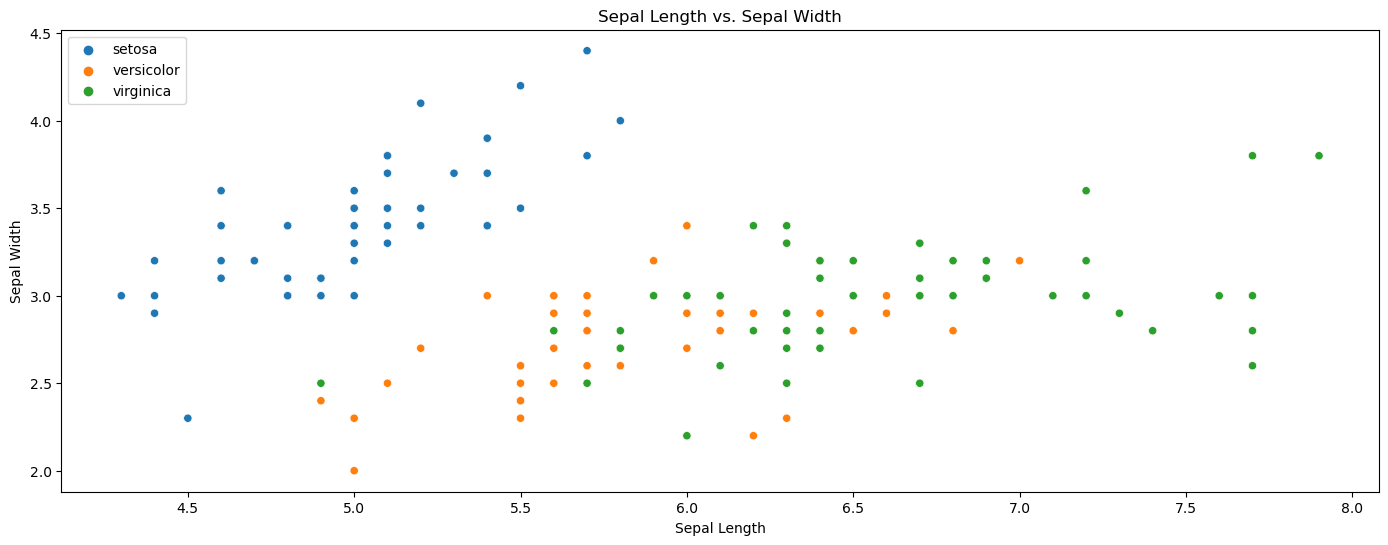

In [78]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Petal Length v/s Petal Width with Species

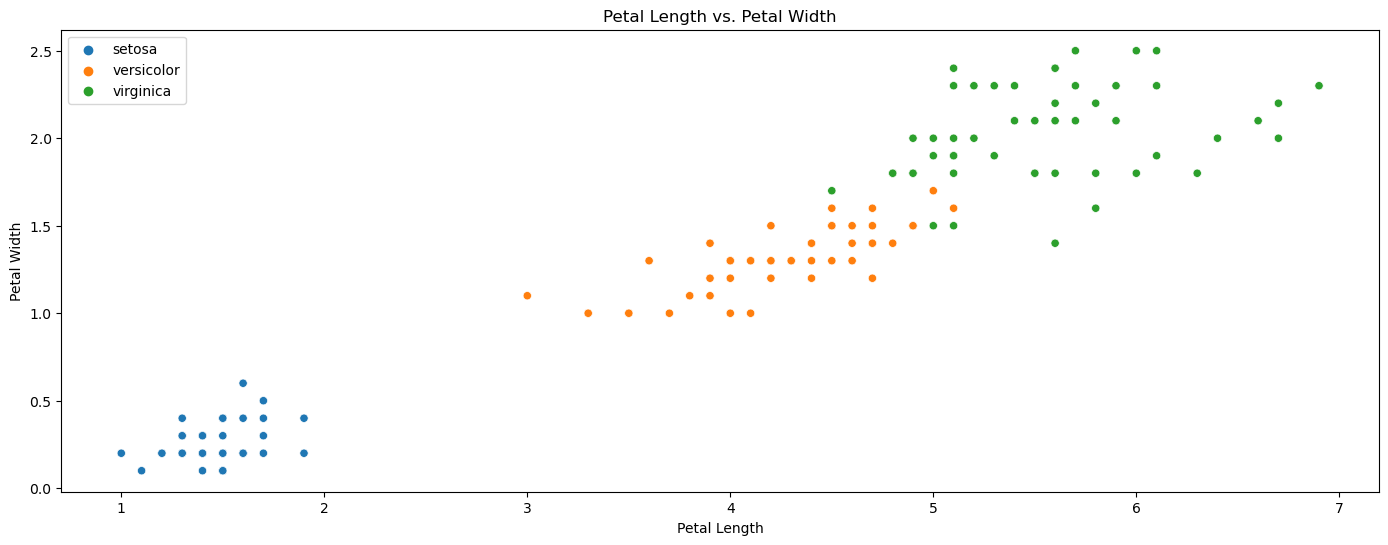

In [79]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# 4. Data Preprocessing

In data preprocessing, we will perform:
    
    1. Check for outliers
    2. Check for correlation
    3. Apply One Hot Encoding to target column
    4. Apply standard scaling
    5. Split data in train and test

# Check Outliers:

In [80]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [81]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [82]:
df_num = df.select_dtypes(exclude = 'object')
for i in df_num.columns:
    out_remove(df,i)
    df.reset_index(drop=True,inplace = True)

sepal_length ------- outliers not present
sepal_width ------- outliers present
petal_length ------- outliers not present
petal_width ------- outliers not present


In [83]:
df.shape

(146, 5)

* After removing outliers, we are left with 146 rows.

# * Check Correlation:

In [84]:
df_num.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

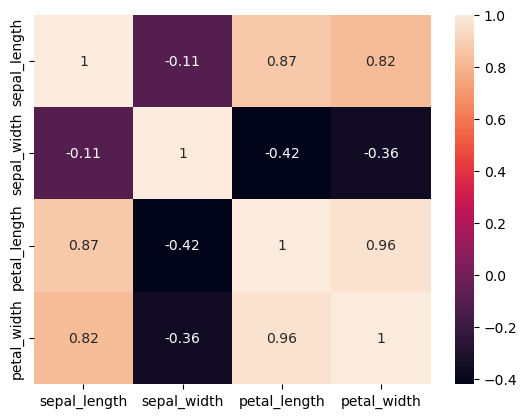

In [85]:
sns.heatmap(df_num.corr(), annot = True)

* Sepal Length is correlated with Petal Length and Petal Width

* Petal Length is correlated with Petal Width

* Since we have only feature columns and all are important for the model building. We will keep all the 4 columns.

# * Apply Label Encoding to the target column:

In [91]:
from sklearn.preprocessing import LabelEncoder 

In [92]:
le = LabelEncoder() 

In [93]:
df['species'] = le.fit_transform(df['species']) 

In [108]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,2.5,5.0,1.9,2
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


# Standard Scaling:

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scale = df.drop('species', axis = 1)

In [97]:
ss = StandardScaler()

In [98]:
scaled_data = ss.fit_transform(scale)

In [99]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [100]:
scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


# * Train Test Split

In [101]:
X = scaled_df
y = df['species']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

# 5. Model Building

# * Scorecard Function

In [104]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])

In [105]:
df_scorecard

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test


In [106]:
def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

# 1. Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

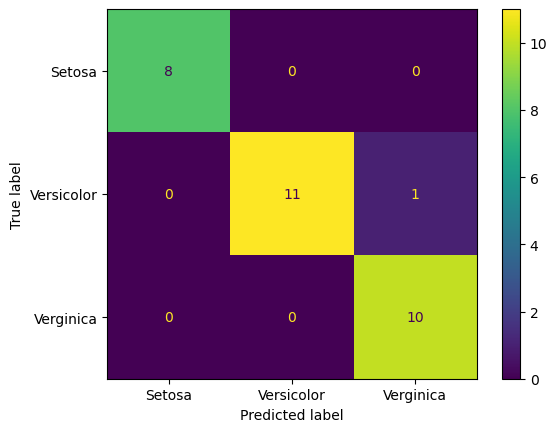

In [109]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
model_lr = lr.fit(X_train, y_train)
ypred_lr = model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train)
cm_lr = confusion_matrix(y_test, ypred_lr)
(ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [110]:
df101 = score_card(df_scorecard, 'Logistic Regression', ypred_lr, y_test, ypred_lr_train, y_train)
df101

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634


# 2. Decision Tree: GridSearchCV

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV as gscv

In [116]:
htmodel = gscv(DecisionTreeClassifier(), param_grid = {'max_depth': [5,10,15,20,25,30],
                                                       'min_samples_leaf': [1,2],
                                                       'min_samples_split': [1,2,3,4],
                                                       'criterion': ['entropy','gini']}, cv = 5)

In [117]:
htmodel.fit(X,y)
print(htmodel.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [118]:
model_gscv = DecisionTreeClassifier(criterion = 'entropy', max_depth = htmodel.best_params_.get('max_depth'),
         min_samples_leaf = htmodel.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel.best_params_.get('min_samples_split')).fit(X_train, y_train)

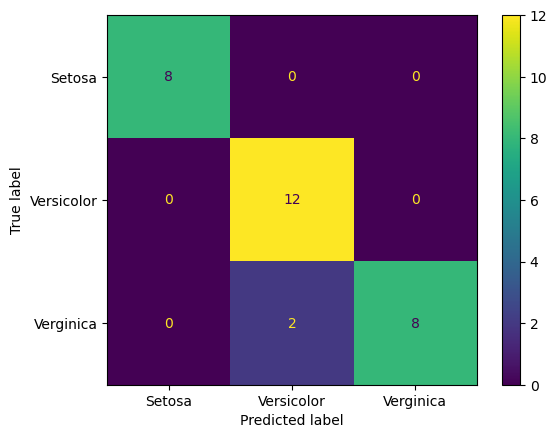

In [121]:
ypred_gscv = model_gscv.predict(X_test)
ypred_gscv_train = model_gscv.predict(X_train)
cm_gscv = confusion_matrix(y_test, ypred_gscv)
(ConfusionMatrixDisplay(confusion_matrix = cm_gscv, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [123]:
df102 = score_card(df101, 'Decision Tree', ypred_gscv, y_test, ypred_gscv_train, y_train)
df102

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322


# 3. Random Forest: GridSearchCV

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
htmodel_rf = gscv(RandomForestClassifier(random_state = 104), param_grid = {'n_estimators': [50, 80, 100, 150, 200],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       'criterion' :['gini', 'entropy']}, cv = 5)

In [127]:
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 80}


In [128]:
model_gscv_rf = RandomForestClassifier(criterion = htmodel_rf.best_params_.get('criterion'),
                                       n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features')).fit(X_train, y_train)

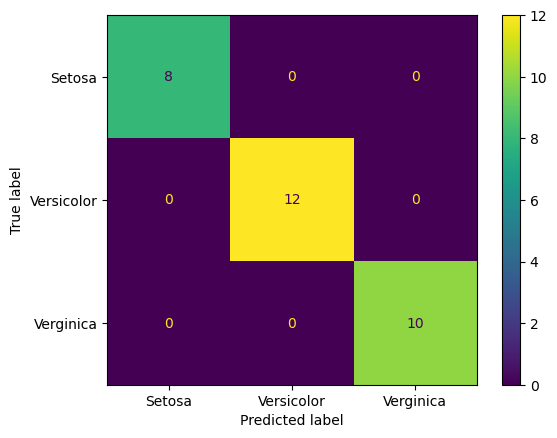

In [129]:
ypred_gscv_rf = model_gscv_rf.predict(X_test)
ypred_gscv_rf_train = model_gscv_rf.predict(X_train)
cm_gscv_rf = confusion_matrix(y_test, ypred_gscv_rf)
(ConfusionMatrixDisplay(confusion_matrix = cm_gscv_rf, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [130]:
df103 = score_card(df102, 'Random Forest', ypred_gscv_rf, y_test, ypred_gscv_rf_train, y_train)
df103

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4. KNeighbors Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier

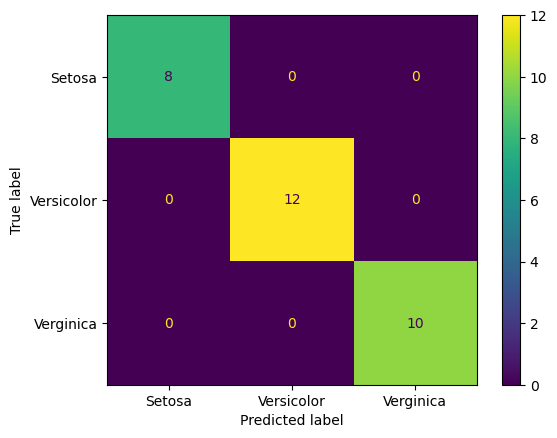

In [132]:
knc = KNeighborsClassifier()
model_knc = knc.fit(X_train, y_train)
ypred_knc = model_knc.predict(X_test)
ypred_knc_train = model_knc.predict(X_train)
cm_knc = confusion_matrix(y_test, ypred_knc)
(ConfusionMatrixDisplay(confusion_matrix = cm_knc, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [133]:
df104 = score_card(df103, 'KNeighbors Classifier', ypred_knc, y_test, ypred_knc_train, y_train)
df104

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNeighbors Classifier,0.939655,0.939912,0.939426,0.939560,1.000000,1.000000,1.000000,1.000000


# 5. Bagging Classifier

In [134]:
from sklearn.ensemble import BaggingClassifier

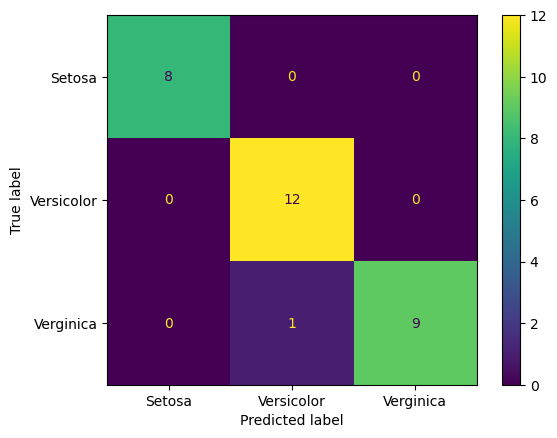

In [135]:
bg = BaggingClassifier(n_estimators = 80, random_state = 102)
model_bg = bg.fit(X_train, y_train)
ypred_bg = model_bg.predict(X_test)
ypred_bg_train = model_bg.predict(X_train)
cm_bg = confusion_matrix(y_test, ypred_bg)
(ConfusionMatrixDisplay(confusion_matrix = cm_bg, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [136]:
df105 = score_card(df104, 'Bagging Classifier', ypred_bg, y_test, ypred_bg_train, y_train)
df105

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNeighbors Classifier,0.939655,0.939912,0.939426,0.939560,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.966667,0.974359,0.966667,0.969123


# 6. SVM

In [137]:
from sklearn.svm import SVC

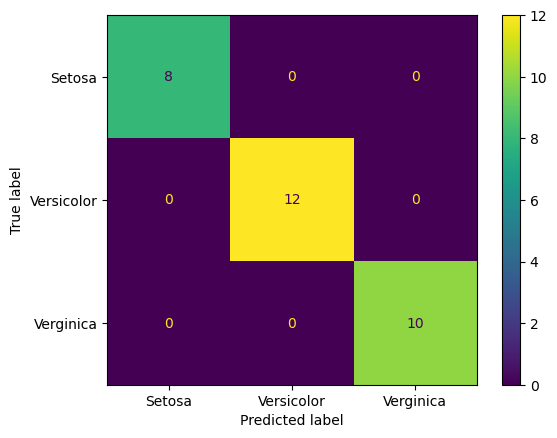

In [138]:
svm = SVC(kernel = 'rbf')
model_svm = svm.fit(X_train, y_train)
ypred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train)
cm_svm = confusion_matrix(y_test, ypred_svm)
(ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [139]:
df106 = score_card(df105, 'SVM', ypred_svm, y_test, ypred_svm_train, y_train)
df106

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNeighbors Classifier,0.939655,0.939912,0.939426,0.939560,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.966667,0.974359,0.966667,0.969123
5,SVM,0.974138,0.974481,0.973649,0.973956,1.000000,1.000000,1.000000,1.000000


# 7. AdaBoost Classifier

In [140]:
from sklearn.ensemble import AdaBoostClassifier

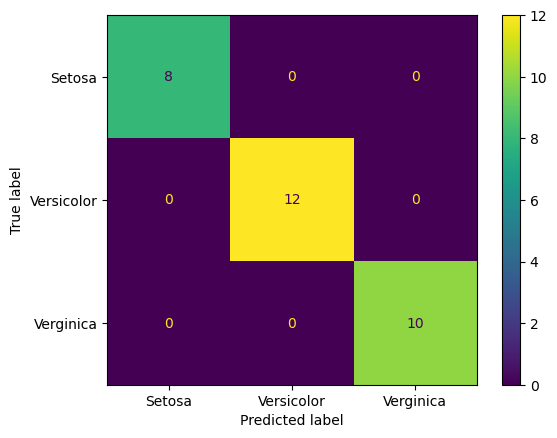

In [141]:
ab = AdaBoostClassifier(n_estimators = 80, random_state = 102)
model_ab = ab.fit(X_train, y_train)
ypred_ab = model_ab.predict(X_test)
ypred_ab_train = model_ab.predict(X_train)
cm_ab = confusion_matrix(y_test, ypred_ab)
(ConfusionMatrixDisplay(confusion_matrix = cm_ab, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [142]:
df107 = score_card(df106, 'AdaBoost Classifier', ypred_ab, y_test, ypred_ab_train, y_train)
df107

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNeighbors Classifier,0.939655,0.939912,0.939426,0.939560,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.966667,0.974359,0.966667,0.969123
5,SVM,0.974138,0.974481,0.973649,0.973956,1.000000,1.000000,1.000000,1.000000
6,AdaBoost Classifier,0.965517,0.966667,0.964640,0.965221,1.000000,1.000000,1.000000,1.000000


# 8. XGBoost

In [145]:
import xgboost
from xgboost import XGBClassifier

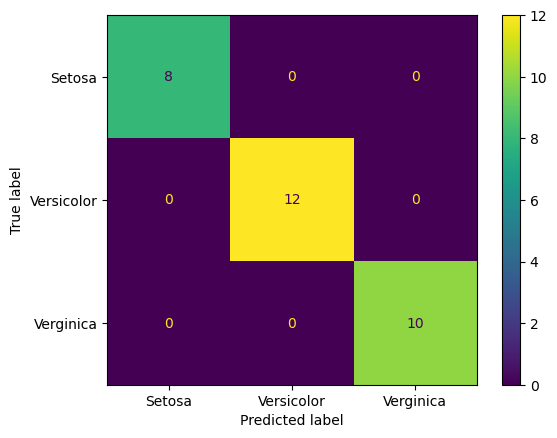

In [149]:
xgb = XGBClassifier(n_estimators = 50, random_state = 102)
model_xgb = xgb.fit(X_train, y_train)
ypred_xgb = model_xgb.predict(X_test)
ypred_xgb_train = model_xgb.predict(X_train)
cm_xgb = confusion_matrix(y_test, ypred_xgb)
(ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = ['Setosa', 'Versicolor', 'Verginica'])).plot()

In [150]:
df108 = score_card(df107, 'XGBoost Classifier', ypred_xgb, y_test, ypred_xgb_train, y_train)
df108

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.931034,0.931746,0.929955,0.930443,0.966667,0.969697,0.972222,0.969634
1,Decision Tree,0.982759,0.982906,0.983333,0.982681,0.933333,0.952381,0.933333,0.937322
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,KNeighbors Classifier,0.939655,0.939912,0.939426,0.939560,1.000000,1.000000,1.000000,1.000000
4,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,0.966667,0.974359,0.966667,0.969123
5,SVM,0.974138,0.974481,0.973649,0.973956,1.000000,1.000000,1.000000,1.000000
6,AdaBoost Classifier,0.965517,0.966667,0.964640,0.965221,1.000000,1.000000,1.000000,1.000000
7,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check for the results of trained model

We will check with XGBoost Model, because of its high performance.

In [152]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,2.5,5.0,1.9,2
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


In [159]:
# Give input as an array
array = np.array([6.2, 2.9, 4.3, 1.3])

# Perform standard sclaer
scaled = ss.transform(array.reshape(1,-1))

# Convert an array to dataframe
sc_df = pd.DataFrame(scaled.reshape(1,4), columns = scale.columns)
sc_df

# Prediction
ypred = model_xgb.predict(sc_df)

if ypred == 0:
    print('Prediction is: {}'.format(ypred))
    print('Predicted flower is Setosa')
elif ypred == 1:
    print('Prediction is: {}'.format(ypred))
    print('Predicted flower is Versicolor')
else:
    print('Prediction is: {}'.format(ypred))
    print('Predicted flower is Verginica')

Prediction is: [1]
Predicted flower is Versicolor


# Conclusion:

In our analysis of Iris flower classification, we distinguished between three distinct species: Setosa, Versicolor, and Virginica. These species were differentiated based on attributes such as petal length and width, as well as sepal length and width. We trained multiple classification models, all of which exhibited strong performance, which can be attributed to the relatively small size of the dataset.